In [1]:
import numpy as np
import pandas as pd

flight = pd.read_csv('data/flight_dataset.csv')
flight.head(5)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


## 데이터 정보 info

In [2]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


## 수치형 자료 통계

In [3]:
flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Stops,10683.0,0.824207,0.675199,0.0,0.0,1.0,1.0,4.0
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0
Date,10683.0,13.508378,8.479277,1.0,6.0,12.0,21.0,27.0
Month,10683.0,4.708602,1.164357,3.0,3.0,5.0,6.0,6.0
Year,10683.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0
Dep_hours,10683.0,12.490686,5.748650,0.0,8.0,11.0,18.0,23.0
Dep_min,10683.0,24.411214,18.767980,0.0,5.0,25.0,40.0,55.0
Arrival_hours,10683.0,13.348778,6.859125,0.0,8.0,14.0,19.0,23.0
Arrival_min,10683.0,24.690630,16.506036,0.0,10.0,25.0,35.0,55.0
Duration_hours,10683.0,10.246560,8.494988,1.0,2.0,8.0,15.0,47.0


In [4]:
flight.drop(columns='Year', inplace=True)

## 범주형 자료 통계

In [5]:
flight.describe(include='object').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537


In [6]:
flight.isna().sum() #결측치 확인

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

In [7]:
print('중복된 값 :', flight.duplicated().sum())
print('중복된 값 비율 :', round(flight.duplicated().sum() / len(flight) * 100,2), '%')

중복된 값 : 222
중복된 값 비율 : 2.08 %


In [8]:
flight.drop_duplicates(inplace = True)
print('제거 후 중복된 값 :', flight.duplicated().sum())
print('저거 후 중복된 값 비율 :', round(flight.duplicated().sum() / len(flight) * 100,2), '%')

제거 후 중복된 값 : 0
저거 후 중복된 값 비율 : 0.0 %


## 이상치 확인

In [9]:
import pandas as pd

def outlier_check(row, colname):  # 이상치를 확인하는 코드
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() # 일괄적으로 보기위해 데이터프레임을 만들었습니다.

for col in flight.select_dtypes(include=['number']).columns: # 수치형데이터만 선택
    outliers_in_col = outlier_check(flight, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,Air India,Delhi,Cochin,3,10493,15,6,5,15,7,40,26,25
1,Air India,Kolkata,Banglore,3,10991,12,5,12,0,23,15,35,15
2,Air India,Delhi,Cochin,3,11543,27,6,5,15,7,40,26,25
3,Air India,Banglore,New Delhi,3,12346,1,3,5,50,12,15,30,25
4,Air India,Delhi,Cochin,3,10703,18,5,5,15,19,15,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Air India,Delhi,Cochin,2,13748,3,3,5,55,19,15,37,20
201,Air India,Delhi,Cochin,2,9653,9,5,5,0,19,15,38,15
202,Air India,Banglore,New Delhi,2,11791,3,3,5,50,22,10,40,20
203,Jet Airways,Delhi,Cochin,2,20694,6,3,19,10,18,50,47,40


In [10]:
flight_sort = flight.sort_values(by=['Month','Date'])
flight_sort.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
7,Jet Airways,Banglore,New Delhi,1,22270,1,3,8,0,5,5,21,5
56,Air India,Banglore,New Delhi,2,17345,1,3,8,50,23,55,15,5
123,Air India,Delhi,Cochin,1,27430,1,3,23,0,19,15,20,15
268,Air India,Chennai,Kolkata,0,19630,1,3,11,40,13,55,2,15


## Data wrangling

In [11]:
flight_filter = flight[['Airline', 'Total_Stops', 'Price', 'Date', 'Month', 'Dep_hours', 
                        'Dep_min', 'Arrival_hours', 'Arrival_min', 'Duration_hours', 'Duration_min']]
flight_grouped = flight_filter.groupby('Airline').agg(['sum','mean','std'])
flight_grouped

Total_Stops                         Price  \
                                          sum      mean       std       sum   
Airline                                                                       
Air Asia                                  147  0.462264  0.553301   1778811   
Air India                                2054  1.211799  0.838480  16196374   
GoAir                                     102  0.525773  0.500627   1137045   
IndiGo                                    831  0.406755  0.509934  11580684   
Jet Airways                              3621  0.978649  0.560798  42916378   
Jet Airways Business                        8  1.333333  0.516398    350152   
Multiple carriers                        1255  1.049331  0.245613  13039603   
Multiple carriers Premium economy          13  1.000000  0.000000    148445   
SpiceJet                                  148  0.181595  0.385747   3533711   
Trujet                                      1  1.000000       NaN      4140   
Vistara                                   215  0.450734  0.498089   3721440   
Vistara Premium economy                     0  0.000000  0.000000     26887   

                                                                Date  \
                                           mean           std    sum   
Airline                                                                
Air Asia                            5593.745283   2029.600211   4423   
Air India                           9555.382891   3937.036277  21774   
GoAir                               5861.056701   2703.585767   2583   
IndiGo                              5668.469897   2266.933697  27847   
Jet Airways                        11599.021081   4315.671402  48811   
Jet Airways Business               58358.666667  11667.596748     13   
Multiple carriers                  10902.678094   3721.234997  17361   
Multiple carriers Premium economy  11418.846154   1717.153936    273   
SpiceJet                            4335.841718   1851.144678  11533   
Trujet                              4140.000000           NaN      6   
Vistara                             7801.761006   2918.335811   6197   
Vistara Premium economy             8962.333333   2915.405518     10   

                                                        Month  ...  \
                                        mean       std    sum  ...   
Airline                                                        ...   
Air Asia                           13.908805  8.399030   1511  ...   
Air India                          12.846018  8.277108   7764  ...   
GoAir                              13.314433  8.869760    906  ...   
IndiGo                             13.630445  8.622170   9399  ...   
Jet Airways                        13.192162  8.273873  17686  ...   
Jet Airways Business                2.166667  2.041241     18  ...   
Multiple carriers                  14.515886  8.854977   5842  ...   
Multiple carriers Premium economy  21.000000  0.000000     39  ...   
SpiceJet                           14.150920  8.568157   3803  ...   
Trujet                              6.000000       NaN      3  ...   
Vistara                            12.991614  8.329098   2205  ...   
Vistara Premium economy             3.333333  2.516611     10  ...   

                                  Arrival_hours Arrival_min             \
                                            std         sum       mean   
Airline                                                                  
Air Asia                               7.610790       10215  32.122642   
Air India                              5.979983       46035  27.159292   
GoAir                                  5.876716        7070  36.443299   
IndiGo                                 7.600367       52870  25.878610   
Jet Airways                            6.244825       86590  23.402703   
Jet Airways Business                   4.215052         170  28.333333   
Multiple carriers                      8.041517   

In [12]:
flight['Dep_total_min'] = flight['Dep_hours'].apply(lambda x: x * 60) + flight['Dep_min']
flight['Arrival_total_min'] = flight['Arrival_hours'].apply(lambda x: x * 60) + flight['Arrival_min']
flight['Duration_total_min'] = flight['Duration_hours'].apply(lambda x: x * 60) + flight['Duration_min']
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Dep_total_min,Arrival_total_min,Duration_total_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,1340,70,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,350,795,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,565,265,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,1085,1410,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,1010,1295,285


In [13]:
flight.drop(columns=['Dep_hours','Dep_min','Arrival_hours','Arrival_min','Duration_hours','Duration_min'], inplace=True)
flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10461 non-null  object
 1   Source              10461 non-null  object
 2   Destination         10461 non-null  object
 3   Total_Stops         10461 non-null  int64 
 4   Price               10461 non-null  int64 
 5   Date                10461 non-null  int64 
 6   Month               10461 non-null  int64 
 7   Dep_total_min       10461 non-null  int64 
 8   Arrival_total_min   10461 non-null  int64 
 9   Duration_total_min  10461 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 899.0+ KB


## EDA (데이터 분포 해석)

### 시계열

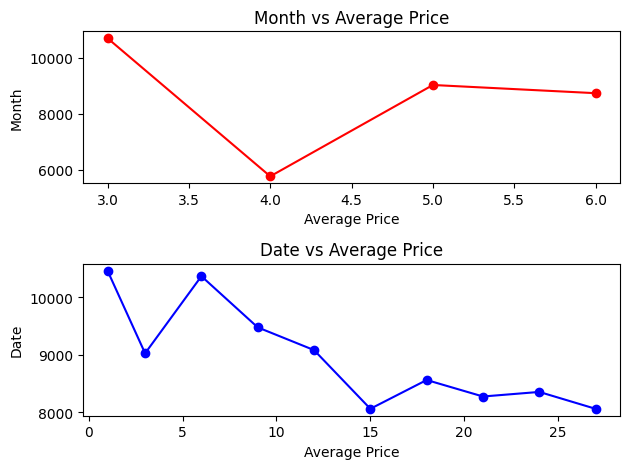

In [14]:
import matplotlib.pyplot as plt

month_avg_price = flight.groupby('Month')['Price'].mean()
date_avg_price = flight.groupby('Date')['Price'].mean()

# month vs price
plt.subplot(2, 1, 1)  
plt.plot(month_avg_price.index, month_avg_price.values, marker='o', color='red')
plt.title('Month vs Average Price')
plt.xlabel('Average Price')
plt.ylabel('Month')

# date vs price
plt.subplot(2, 1, 2)  
plt.plot(date_avg_price.index, date_avg_price.values, marker='o', color='blue')
plt.title('Date vs Average Price')
plt.xlabel('Average Price')
plt.ylabel('Date')

plt.tight_layout() 
plt.show()

In [15]:
price_grouped = flight_grouped['Price'].reset_index()
price_grouped

,Airline,sum,mean,std
0,Air Asia,1778811,5593.745283,2029.600211
1,Air India,16196374,9555.382891,3937.036277
2,GoAir,1137045,5861.056701,2703.585767
3,IndiGo,11580684,5668.469897,2266.933697
4,Jet Airways,42916378,11599.021081,4315.671402
5,Jet Airways Business,350152,58358.666667,11667.596748
6,Multiple carriers,13039603,10902.678094,3721.234997
7,Multiple carriers Premium economy,148445,11418.846154,1717.153936
8,SpiceJet,3533711,4335.841718,1851.144678
9,Trujet,4140,4140.000000,NaN


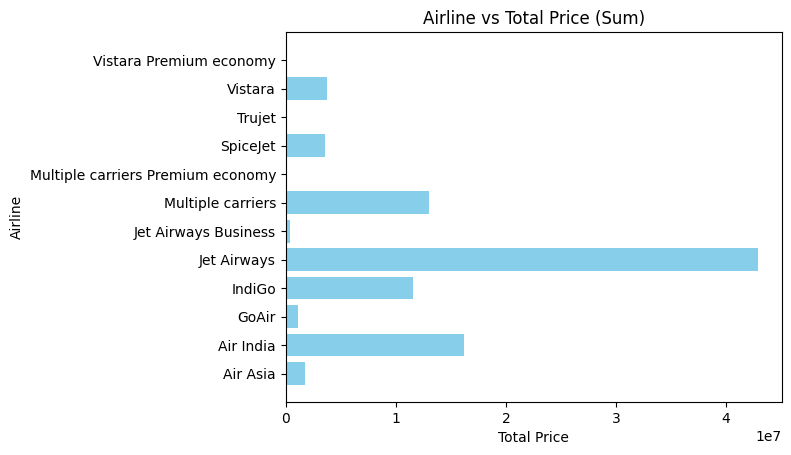

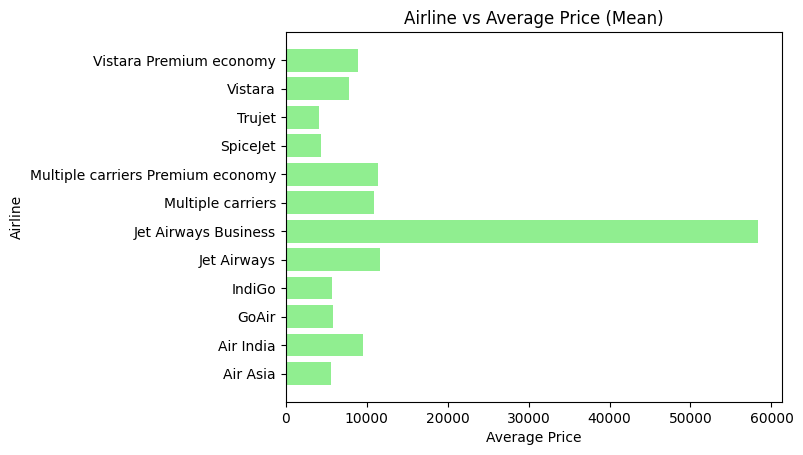

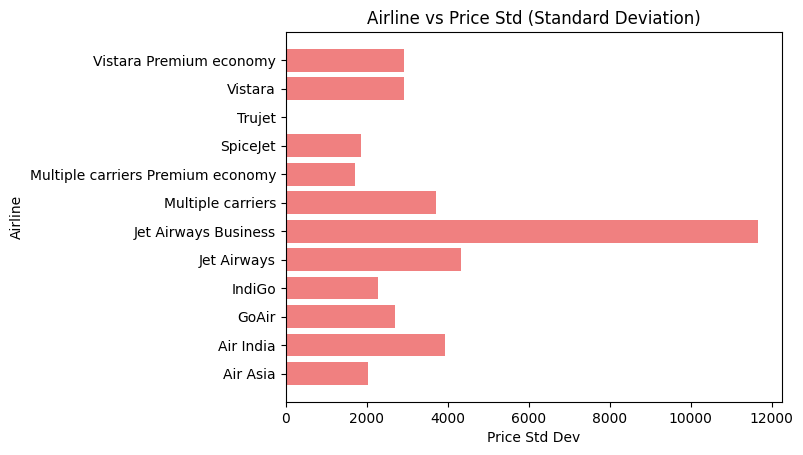

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 항공사별 'Price'의 sum, mean, std 값들을 데이터프레임으로 변환
price_grouped = flight_grouped['Price'].reset_index()

# 항공사 이름
airlines = price_grouped['Airline']

# sum, mean, std 값을 각각 추출
price_sum = price_grouped[('sum')]
price_mean = price_grouped[('mean')]
price_std = price_grouped[('std')]

# 항공사별 'Price' sum 시각화
plt.barh(airlines, price_sum, color='skyblue')
plt.title('Airline vs Total Price (Sum)')
plt.ylabel('Airline')
plt.xlabel('Total Price')
plt.show()

# 항공사별 'Price' mean 시각화
plt.barh(airlines, price_mean, color='lightgreen')
plt.title('Airline vs Average Price (Mean)')
plt.ylabel('Airline')
plt.xlabel('Average Price')
plt.show()

# 항공사별 'Price' std 시각화
plt.barh(airlines, price_std, color='lightcoral')
plt.title('Airline vs Price Std (Standard Deviation)')
plt.ylabel('Airline')
plt.xlabel('Price Std Dev')
plt.show()

plt.tight_layout()
plt.show()

In [17]:
flight_grouped

Total_Stops                         Price  \
                                          sum      mean       std       sum   
Airline                                                                       
Air Asia                                  147  0.462264  0.553301   1778811   
Air India                                2054  1.211799  0.838480  16196374   
GoAir                                     102  0.525773  0.500627   1137045   
IndiGo                                    831  0.406755  0.509934  11580684   
Jet Airways                              3621  0.978649  0.560798  42916378   
Jet Airways Business                        8  1.333333  0.516398    350152   
Multiple carriers                        1255  1.049331  0.245613  13039603   
Multiple carriers Premium economy          13  1.000000  0.000000    148445   
SpiceJet                                  148  0.181595  0.385747   3533711   
Trujet                                      1  1.000000       NaN      4140   
Vistara                                   215  0.450734  0.498089   3721440   
Vistara Premium economy                     0  0.000000  0.000000     26887   

                                                                Date  \
                                           mean           std    sum   
Airline                                                                
Air Asia                            5593.745283   2029.600211   4423   
Air India                           9555.382891   3937.036277  21774   
GoAir                               5861.056701   2703.585767   2583   
IndiGo                              5668.469897   2266.933697  27847   
Jet Airways                        11599.021081   4315.671402  48811   
Jet Airways Business               58358.666667  11667.596748     13   
Multiple carriers                  10902.678094   3721.234997  17361   
Multiple carriers Premium economy  11418.846154   1717.153936    273   
SpiceJet                            4335.841718   1851.144678  11533   
Trujet                              4140.000000           NaN      6   
Vistara                             7801.761006   2918.335811   6197   
Vistara Premium economy             8962.333333   2915.405518     10   

                                                        Month  ...  \
                                        mean       std    sum  ...   
Airline                                                        ...   
Air Asia                           13.908805  8.399030   1511  ...   
Air India                          12.846018  8.277108   7764  ...   
GoAir                              13.314433  8.869760    906  ...   
IndiGo                             13.630445  8.622170   9399  ...   
Jet Airways                        13.192162  8.273873  17686  ...   
Jet Airways Business                2.166667  2.041241     18  ...   
Multiple carriers                  14.515886  8.854977   5842  ...   
Multiple carriers Premium economy  21.000000  0.000000     39  ...   
SpiceJet                           14.150920  8.568157   3803  ...   
Trujet                              6.000000       NaN      3  ...   
Vistara                            12.991614  8.329098   2205  ...   
Vistara Premium economy             3.333333  2.516611     10  ...   

                                  Arrival_hours Arrival_min             \
                                            std         sum       mean   
Airline                                                                  
Air Asia                               7.610790       10215  32.122642   
Air India                              5.979983       46035  27.159292   
GoAir                                  5.876716        7070  36.443299   
IndiGo                                 7.600367       52870  25.878610   
Jet Airways                            6.244825       86590  23.402703   
Jet Airways Business                   4.215052         170  28.333333   
Multiple carriers                      8.041517   

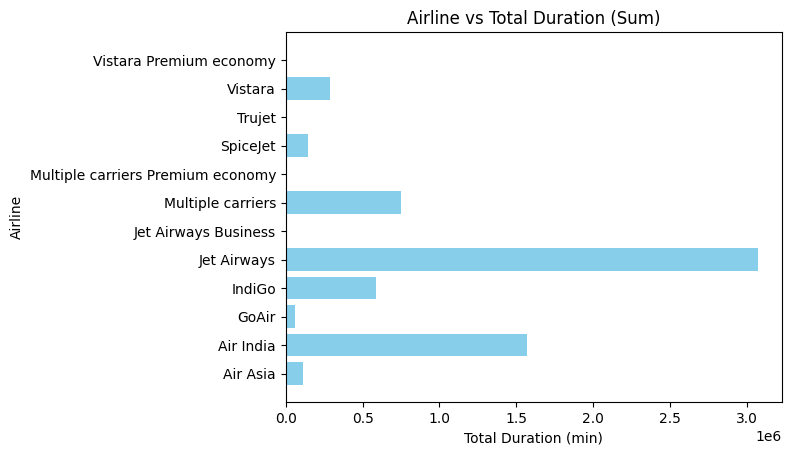

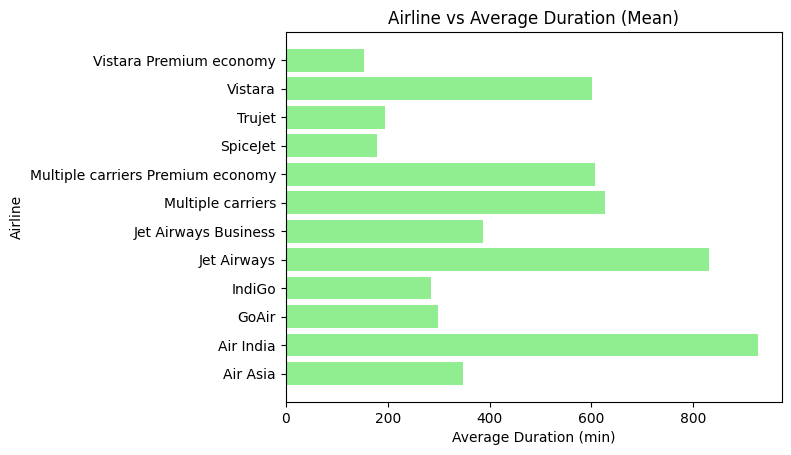

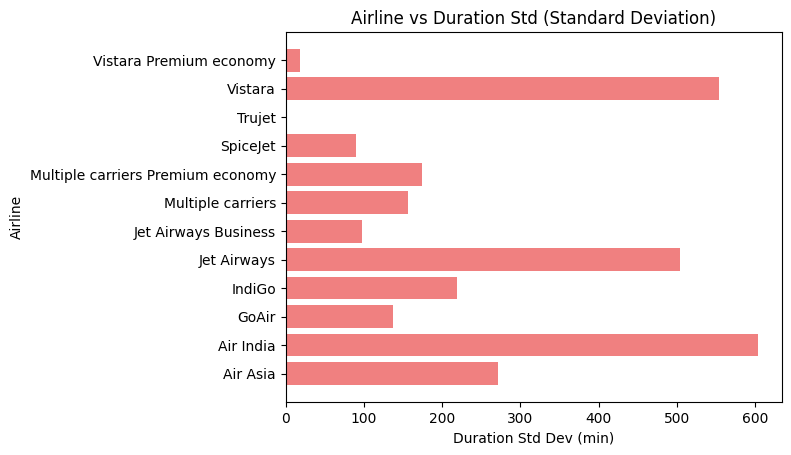

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 항공사별 'Duration_total_min'의 sum, mean, std 값들을 데이터프레임으로 변환
flight_grouped = flight[['Airline','Duration_total_min']].groupby(by='Airline').agg(['sum','mean','std'])
duration_grouped = flight_grouped['Duration_total_min'].reset_index()

# 항공사 이름
airlines = duration_grouped['Airline']

# sum, mean, std 값을 각각 추출
duration_sum = duration_grouped[( 'sum')]
duration_mean = duration_grouped[('mean')]
duration_std = duration_grouped[('std')]

# 항공사별 'Duration_total_min' sum 시각화
plt.barh(airlines, duration_sum, color='skyblue')
plt.title('Airline vs Total Duration (Sum)')
plt.ylabel('Airline')
plt.xlabel('Total Duration (min)')
plt.show()

# 항공사별 'Duration_total_min' mean 시각화
plt.barh(airlines, duration_mean, color='lightgreen')
plt.title('Airline vs Average Duration (Mean)')
plt.ylabel('Airline')
plt.xlabel('Average Duration (min)')
plt.show()

# 항공사별 'Duration_total_min' std 시각화
plt.barh(airlines, duration_std, color='lightcoral')
plt.title('Airline vs Duration Std (Standard Deviation)')
plt.ylabel('Airline')
plt.xlabel('Duration Std Dev (min)')
plt.show()

plt.tight_layout()  # 그래프 간 간격 자동 조정


## Histgram

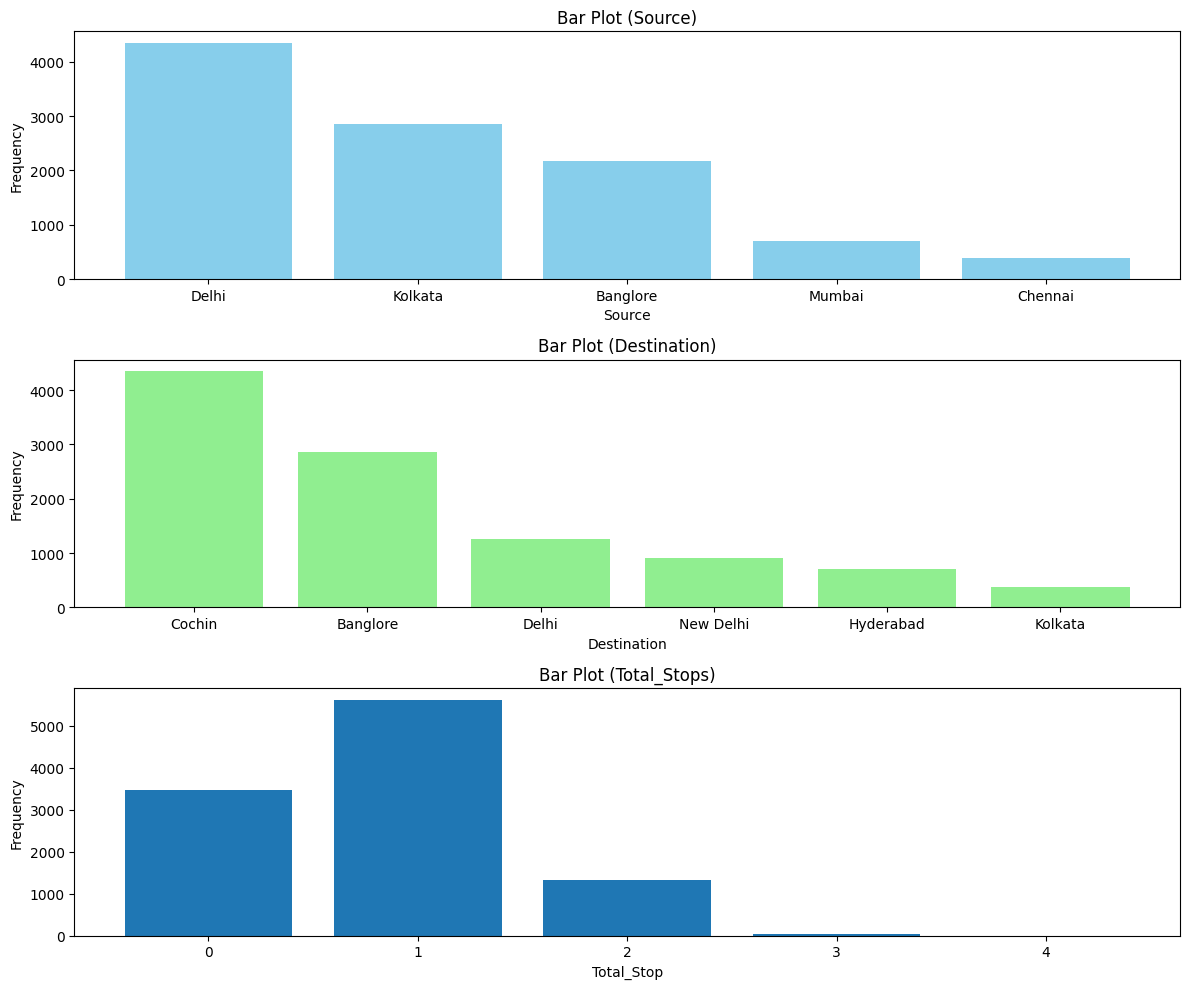

In [19]:
# Source 데이터의 빈도 계산
source_counts = flight['Source'].value_counts()

# Destination 데이터의 빈도 계산
destination_counts = flight['Destination'].value_counts()

stops_counts = flight['Total_Stops'].value_counts()

# 그래프 크기 설정
plt.figure(figsize=(12, 10))

# Source 빈도 막대 그래프
plt.subplot(3, 1, 1)
plt.bar(source_counts.index, source_counts.values, color='skyblue')
plt.title('Bar Plot (Source)')
plt.xlabel('Source')
plt.ylabel('Frequency')

# Destination 빈도 막대 그래프
plt.subplot(3, 1, 2)
plt.bar(destination_counts.index, destination_counts.values, color='lightgreen')
plt.title('Bar Plot (Destination)')
plt.xlabel('Destination')
plt.ylabel('Frequency')

# Destination 빈도 막대 그래프
plt.subplot(3, 1, 3)
plt.bar(stops_counts.index, stops_counts.values)
plt.title('Bar Plot (Total_Stops)')
plt.xlabel('Total_Stop')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

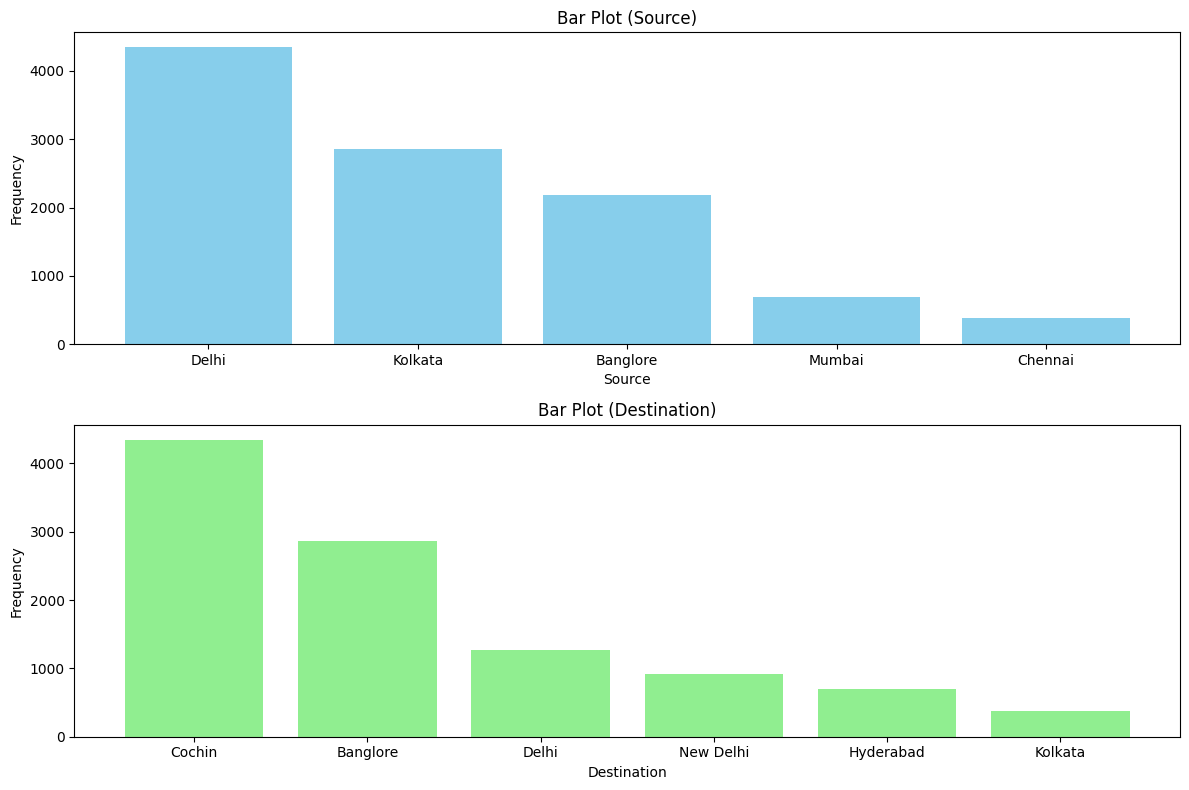

In [20]:
# Source 데이터의 빈도 계산
stops_counts = flight['Total_Stops'].value_counts()

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# Source 빈도 막대 그래프
plt.subplot(2, 1, 1)
plt.bar(source_counts.index, source_counts.values, color='skyblue')
plt.title('Bar Plot (Source)')
plt.xlabel('Source')
plt.ylabel('Frequency')

# Destination 빈도 막대 그래프
plt.subplot(2, 1, 2)
plt.bar(destination_counts.index, destination_counts.values, color='lightgreen')
plt.title('Bar Plot (Destination)')
plt.xlabel('Destination')
plt.ylabel('Frequency')

# 그래프 간 간격 자동 조정
plt.tight_layout()
plt.show()

In [21]:
flight.head(1)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_total_min,Arrival_total_min,Duration_total_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1340,70,170


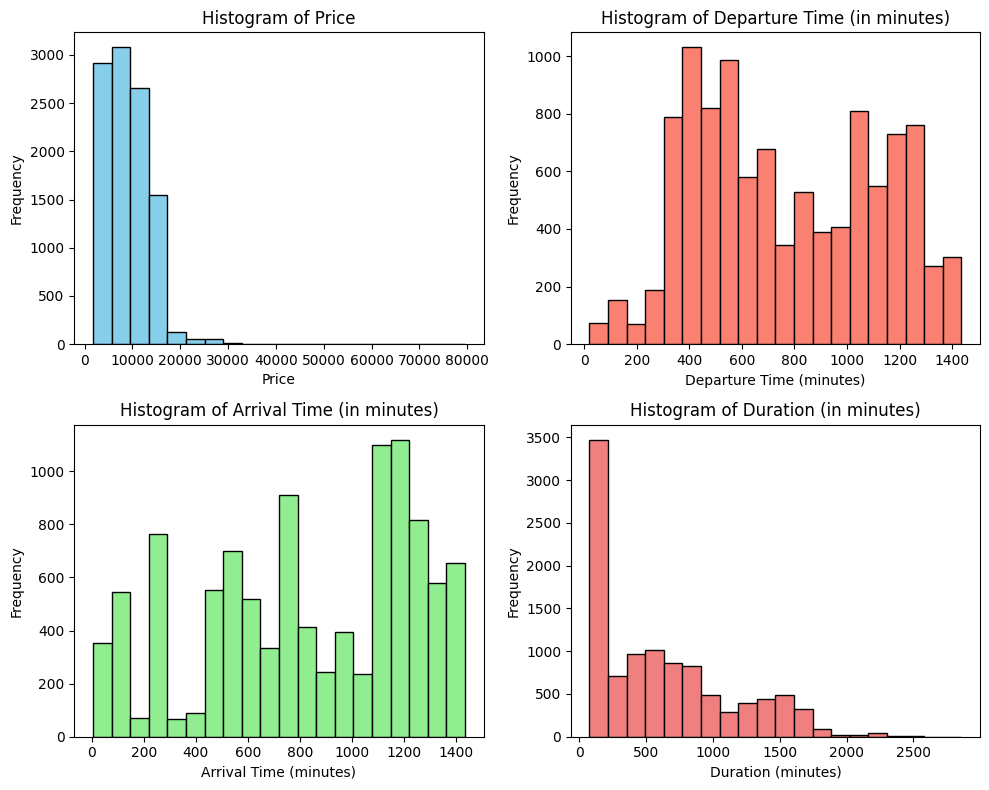

In [22]:
import matplotlib.pyplot as plt

# 전체 크기 설정
plt.figure(figsize=(10, 8))

# Price 히스토그램
plt.subplot(2, 2, 1) 
plt.hist(flight['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Departure Time (in minutes) 히스토그램
plt.subplot(2, 2, 2) 
plt.hist(flight['Dep_total_min'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Departure Time (in minutes)')
plt.xlabel('Departure Time (minutes)')
plt.ylabel('Frequency')

# Arrival Time (in minutes) 히스토그램
plt.subplot(2, 2, 3)  
plt.hist(flight['Arrival_total_min'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Arrival Time (in minutes)')
plt.xlabel('Arrival Time (minutes)')
plt.ylabel('Frequency')

# Duration (in minutes) 히스토그램
plt.subplot(2, 2, 4)  
plt.hist(flight['Duration_total_min'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Duration (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')


plt.tight_layout()  
plt.show()

## boxplot

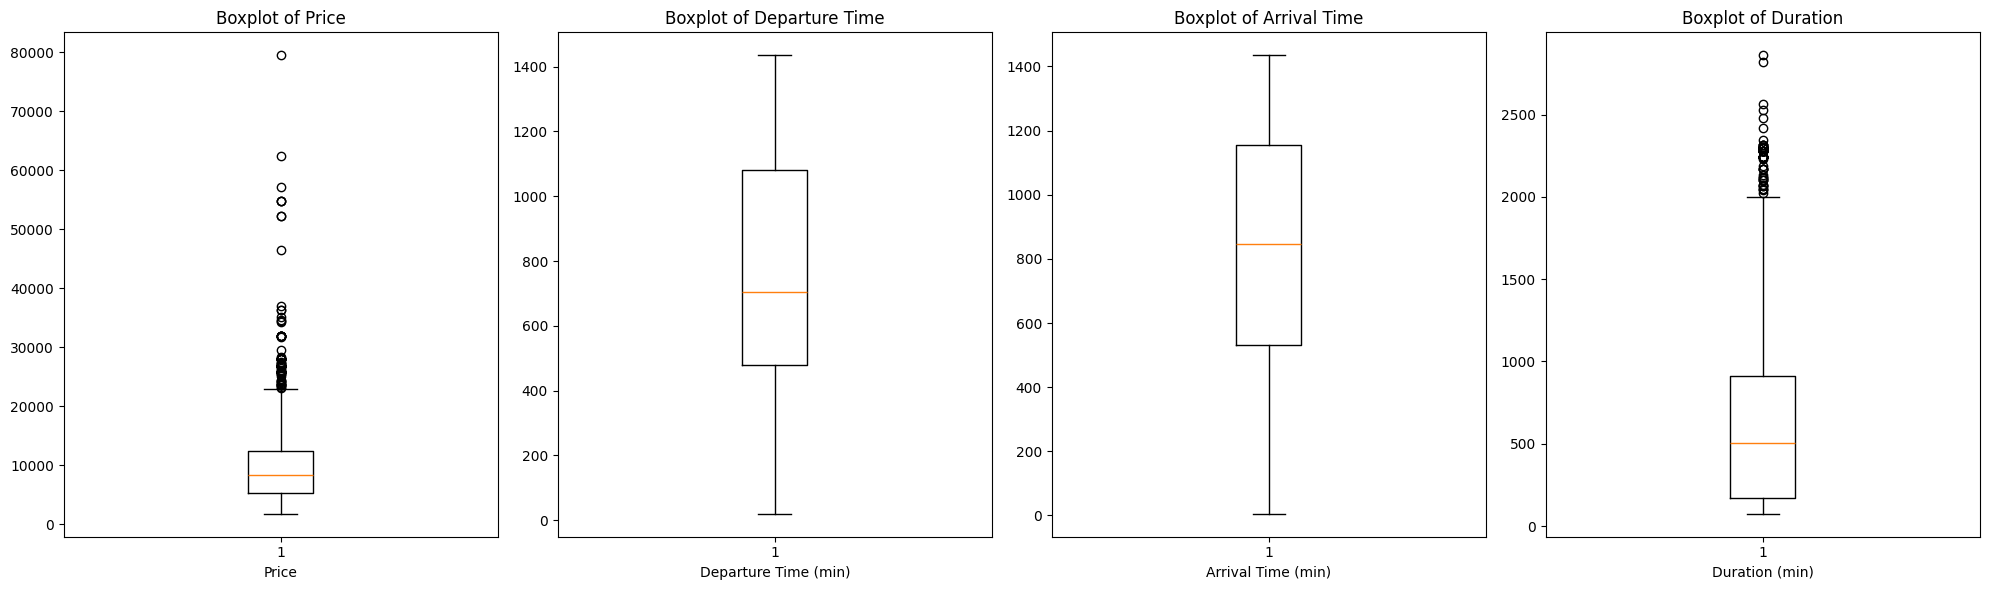

In [23]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# GridSpec을 사용하여 레이아웃 설정
fig = plt.figure(figsize=(20, 6))
gs = GridSpec(1, 4, figure=fig, width_ratios=[1, 1, 1, 1])  

# Price 박스 플롯
ax1 = fig.add_subplot(gs[0, 0])
ax1.boxplot(flight['Price'])
ax1.set_title('Boxplot of Price')
ax1.set_xlabel('Price')

# Departure Time 박스 플롯
ax2 = fig.add_subplot(gs[0, 1])
ax2.boxplot(flight['Dep_total_min'])
ax2.set_title('Boxplot of Departure Time')
ax2.set_xlabel('Departure Time (min)')

# Arrival Time 박스 플롯
ax3 = fig.add_subplot(gs[0, 2])
ax3.boxplot(flight['Arrival_total_min'])
ax3.set_title('Boxplot of Arrival Time')
ax3.set_xlabel('Arrival Time (min)')

# Duration 박스 플롯
ax4 = fig.add_subplot(gs[0, 3])
ax4.boxplot(flight['Duration_total_min'])
ax4.set_title('Boxplot of Duration')
ax4.set_xlabel('Duration (min)')

plt.tight_layout()  
plt.show()


## PairPlot

import seaborn as sns

sns.pairplot(flight[['Airline','Price', 'Dep_total_min', 'Arrival_total_min', 'Duration_total_min']], palette="coolwarm", hue='Airline')
plt.show()

In [24]:
flight.head(1)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_total_min,Arrival_total_min,Duration_total_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1340,70,170


# 기말 과제

## 목차
1. 웟-핫 인코딩 후 상관도 분석
2. 모든 회귀 모델 비교 및 성능 평가 비교
3. 모델 향상 전략
   - 데이터 증강
   - 앙상블
   - 하이퍼파라미터 (그리드서치)
4. 결론

## 1. 원-핫 인코딩 후 상관도 분석

In [25]:
from sklearn.preprocessing import LabelEncoder

le_Airline = LabelEncoder()
le_Source = LabelEncoder()
le_Destination = LabelEncoder()

flight['Airline'] = le_Airline.fit_transform(flight['Airline'])
flight['Source'] = le_Source.fit_transform(flight['Source'])
flight['Destination'] = le_Destination.fit_transform(flight['Destination'])

flight.head(5)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_total_min,Arrival_total_min,Duration_total_min
0,3,0,5,0,3897,24,3,1340,70,170
1,1,3,0,2,7662,1,5,350,795,445
2,4,2,1,2,13882,9,6,565,265,1140
3,3,3,0,1,6218,12,5,1085,1410,325
4,3,0,5,1,13302,1,3,1010,1295,285


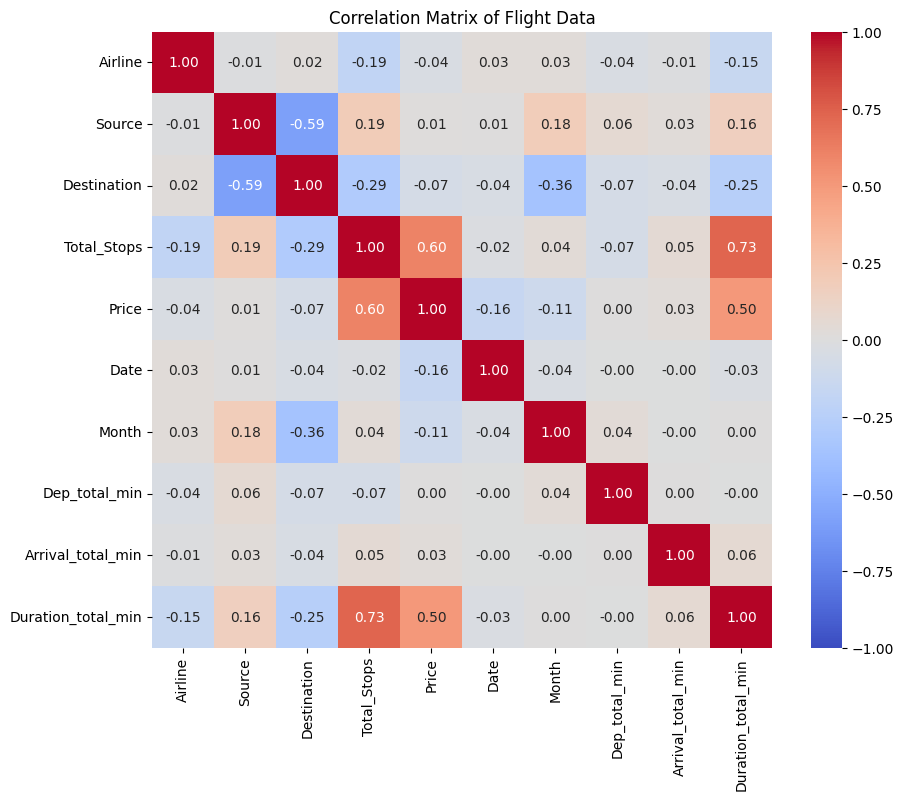

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관 계수 계산
corr = flight.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar=True)

# 제목 및 축 레이블 설정
plt.title('Correlation Matrix of Flight Data')
plt.show()


In [27]:
flight.head(5)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_total_min,Arrival_total_min,Duration_total_min
0,3,0,5,0,3897,24,3,1340,70,170
1,1,3,0,2,7662,1,5,350,795,445
2,4,2,1,2,13882,9,6,565,265,1140
3,3,3,0,1,6218,12,5,1085,1410,325
4,3,0,5,1,13302,1,3,1010,1295,285


## 스케일링 마무리

In [28]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(flight[['Price', 'Dep_total_min', 'Arrival_total_min', 'Duration_total_min']])

flight[['Price', 'Dep_total_min', 'Arrival_total_min', 'Duration_total_min']] = scaled_data

flight.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_total_min,Arrival_total_min,Duration_total_min
0,3,0,5,0,-0.613451,24,3,1.058333,-1.240,-0.452703
1,1,3,0,2,-0.084808,1,5,-0.591667,-0.080,-0.081081
2,4,2,1,2,0.788543,9,6,-0.233333,-0.928,0.858108
3,3,3,0,1,-0.287560,12,5,0.633333,0.904,-0.243243
4,3,0,5,1,0.707105,1,3,0.508333,0.720,-0.297297


In [29]:
flight.info() # 전처리가 완료된 데이터셋

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline             10461 non-null  int32  
 1   Source              10461 non-null  int32  
 2   Destination         10461 non-null  int32  
 3   Total_Stops         10461 non-null  int64  
 4   Price               10461 non-null  float64
 5   Date                10461 non-null  int64  
 6   Month               10461 non-null  int64  
 7   Dep_total_min       10461 non-null  float64
 8   Arrival_total_min   10461 non-null  float64
 9   Duration_total_min  10461 non-null  float64
dtypes: float64(4), int32(3), int64(3)
memory usage: 776.4 KB


In [30]:
flight.head(5)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_total_min,Arrival_total_min,Duration_total_min
0,3,0,5,0,-0.613451,24,3,1.058333,-1.240,-0.452703
1,1,3,0,2,-0.084808,1,5,-0.591667,-0.080,-0.081081
2,4,2,1,2,0.788543,9,6,-0.233333,-0.928,0.858108
3,3,3,0,1,-0.287560,12,5,0.633333,0.904,-0.243243
4,3,0,5,1,0.707105,1,3,0.508333,0.720,-0.297297


## 2. 회귀 모델 비교 및 성능 평가 비교

In [31]:
# 라이브러리 임포트
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### - 훈련 데이터와 테스트 데이터 정의

In [32]:
X = flight.drop('Price', axis=1)
y = flight['Price']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 12가지의 회귀 분석 모델 정의

In [33]:
# 모델 리스트 정의
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}

# 평가 함수 정의
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # 모델 훈련
    y_pred = model.predict(X_test)  # 예측값 생성
    
    # 평가 지표 계산
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

In [34]:
# 모든 모델에 대해 훈련 및 평가
results = {}

for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"MSE": mse, "R²": r2}

# 결과를 데이터프레임으로 정리
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

# 결과 출력
results_df

,MSE,R²
XGBoost,0.063556,0.841323
Random Forest,0.075681,0.811054
MLP Regressor,0.096477,0.759133
KNN,0.112661,0.718727
Decision Tree,0.117262,0.707241
Polynomial Regression,0.159043,0.602927
SVR,0.163524,0.591740
Linear Regression,0.218205,0.455224
Ridge,0.218205,0.455224
Bayesian Ridge,0.218206,0.455221


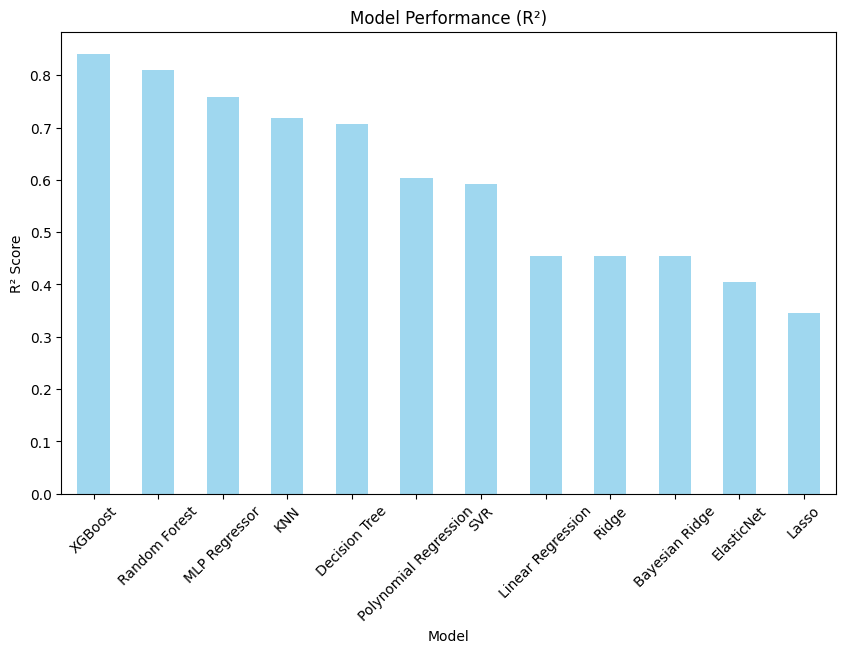

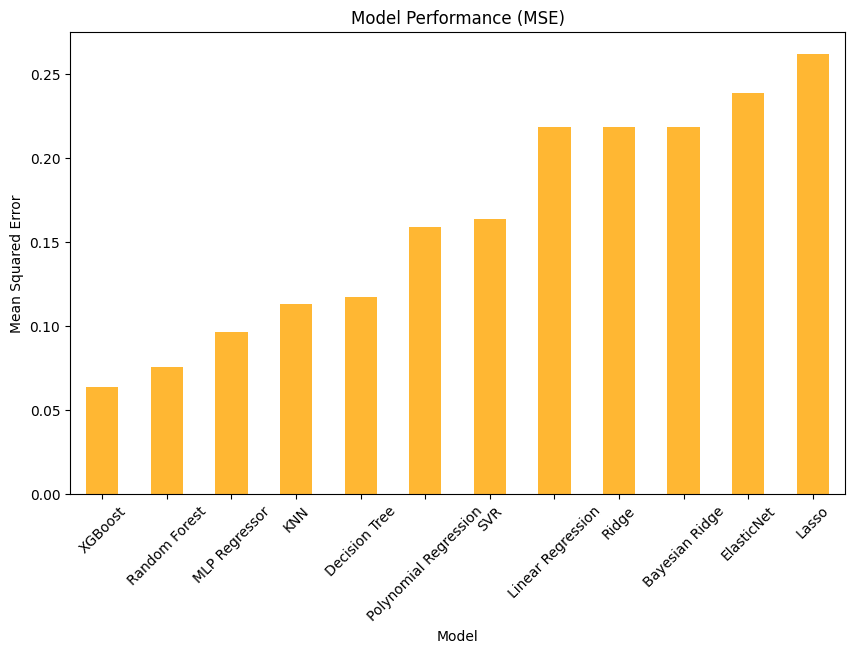

Best Model:
MSE    0.063556
R²     0.841323
Name: XGBoost, dtype: float64


In [35]:
# R² 값 시각화
results_df["R²"].plot(kind="bar", figsize=(10, 6), color="skyblue", alpha=0.8)
plt.title("Model Performance (R²)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

# MSE 값 시각화
results_df["MSE"].plot(kind="bar", figsize=(10, 6), color="orange", alpha=0.8)
plt.title("Model Performance (MSE)")
plt.ylabel("Mean Squared Error")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

# 최적 모델 출력
best_model = results_df.loc[results_df["R²"].idxmax()]
print("Best Model:")
print(best_model)

### 3. 모델 성능 향상 전략

### 데이터 처리

In [36]:
# 데이터 증강

# 데이터 증강: 약간의 랜덤 노이즈 추가
def augment_data(X, y, noise_level=0.01, num_copies=5):
    augmented_X = X.copy()
    augmented_y = y.copy()
    for _ in range(num_copies):
        noise = np.random.normal(0, noise_level, X.shape)
        augmented_X = np.vstack([augmented_X, X + noise])
        augmented_y = np.hstack([augmented_y, y])
    return augmented_X, augmented_y

# 증강 적용
X_train_aug, y_train_aug = augment_data(X_train.to_numpy(), y_train.to_numpy())

In [37]:
# 아웃라이어 처리

# 아웃라이어 탐지 및 제거
def remove_outliers(X, y):
    Q1 = np.percentile(y, 25)
    Q3 = np.percentile(y, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    mask = (y >= lower_bound) & (y <= upper_bound)
    return X[mask], y[mask]

# 아웃라이어 제거 적용
X_train_clean, y_train_clean = remove_outliers(X_train_aug, y_train_aug)

In [38]:
# 성능 향상 비교
model =  XGBRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)   
model.fit(X_train_aug, y_train_aug)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'XGboost의 MSE : {mse:.3f}')
print(f'XGboost의 R2 : {r2:.3f}\n')

model.fit(X_train_aug, y_train_aug)
y_pred = model.predict(X_test)   
model.fit(X_train_aug, y_train_aug)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'데이터 증강 이후 XGboost의 MSE : {mse:.3f}')
print(f'데이터 증강 이후 XGboost의 R2 : {r2:.3f}\n')

model.fit(X_train_clean, y_train_clean)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'아웃라이어 제거 이후 XGboost의 MSE : {mse:.3f}')
print(f'아웃라이어 제거 이후 XGboost의 R2 : {r2:.3f}')

XGboost의 MSE : 0.064
XGboost의 R2 : 0.841

데이터 증강 이후 XGboost의 MSE : 0.066
데이터 증강 이후 XGboost의 R2 : 0.834

아웃라이어 제거 이후 XGboost의 MSE : 0.072
아웃라이어 제거 이후 XGboost의 R2 : 0.821


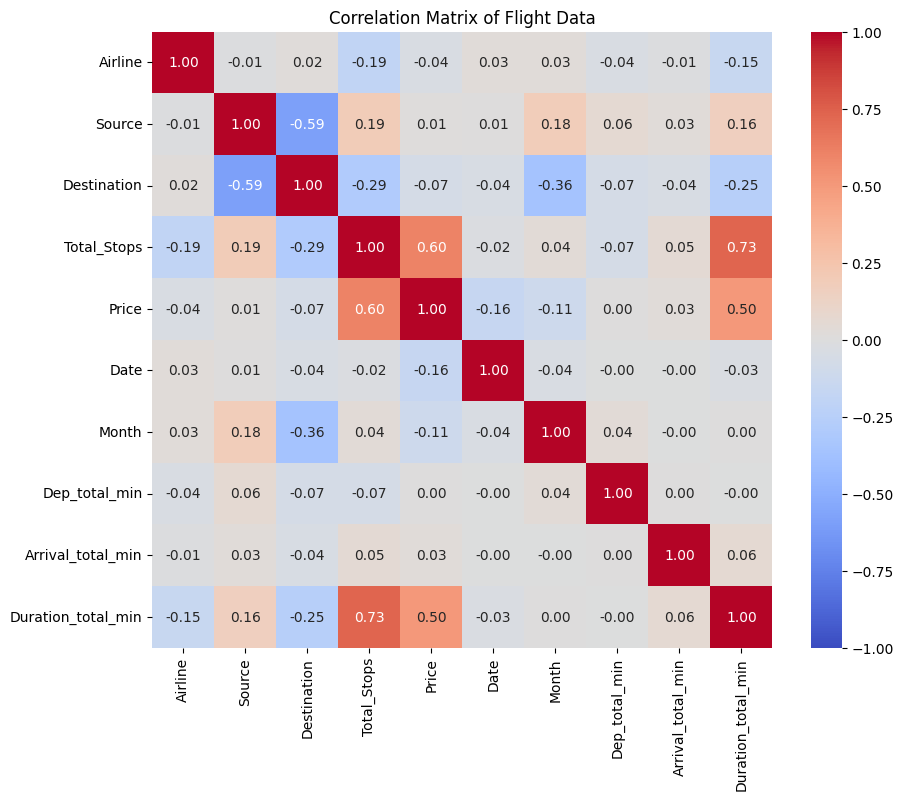

In [39]:
# 피쳐 상관도 고려후 선택
# 상관 계수 계산
corr = flight.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar=True)

# 제목 및 축 레이블 설정
plt.title('Correlation Matrix of Flight Data')
plt.show()


In [57]:
# 종속변수와 상관도가 높으며, 독립변수끼리 상관도가 높은 변수 제거
# Airline , Source(뺴기) , Destination, Total_Stops(넣기), Date, Month, Dep_total_min(빼기), Duration_total_min(넣기)

X = flight[['Airline','Destination', 'Total_Stops', 'Date', 'Month','Arrival_total_min' ,'Duration_total_min']]
y = flight['Price']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model =  XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'피쳐엔지니어링 후 XGboost의 MSE : {mse:.3f}')
print(f'피쳐엔지니어링 후 XGboost의 R2 : {r2:.3f}')

피쳐엔지니어링 후 XGboost의 MSE : 0.063
피쳐엔지니어링 후 XGboost의 R2 : 0.844


### 그리드 서치

In [50]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.2, 0.25],
    'max_depth': [7, 8, 9],
    'min_child_weight': [9, 10, 11],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# XGBRegressor 초기화
xgb_model = XGBRegressor(random_state=42)

# GridSearchCV 초기화
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # MSE를 음수로 변환하여 사용
    cv=3,  # 교차검증
    n_jobs=-1,  # 병렬 처리
    verbose=1  # 진행 상황 출력
)

# GridSearchCV 실행
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터와 점수 출력
print("Best parameters:", grid_search.best_params_)
print("Best MSE (negative):", grid_search.best_score_)

# 최적 모델로 테스트
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
print(f'Tuned XGBoost MSE: {mean_squared_error(y_test, y_pred):.3f}')
print(f'Tuned XGBoost R2: {r2_score(y_test, y_pred):.3f}')

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 9, 'n_estimators': 200, 'subsample': 1.0}
Best MSE (negative): -0.07643323568632636
Tuned XGBoost MSE: 0.067
Tuned XGBoost R2: 0.832


### 랜덤 서치

In [65]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 하이퍼파라미터 분포 정의
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 10],
    'min_child_weight': [1, 3, 5, 7, 9],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}

# XGBRegressor 초기화
xgb_model = XGBRegressor(random_state=42)

# RandomizedSearchCV 초기화
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # 탐색할 파라미터 조합의 수
    scoring='neg_mean_squared_error',  # MSE를 음수로 변환하여 사용
    cv=3,  # 교차검증
    n_jobs=-1,  # 병렬 처리
    verbose=1,  # 진행 상황 출력
    random_state=42  # 랜덤 시드 설정
)

# 랜덤 서치 실행
random_search.fit(X_train, y_train)

# 최적 하이퍼파라미터와 점수 출력
print("Best parameters:", random_search.best_params_)
print("Best MSE (negative):", random_search.best_score_)

# 최적 모델로 테스트
best_xgb_model = random_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
print(f'Tuned XGBoost MSE: {mean_squared_error(y_test, y_pred):.3f}')
print(f'Tuned XGBoost R2: {r2_score(y_test, y_pred):.3f}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best MSE (negative): -0.073367183686906
Tuned XGBoost MSE: 0.065
Tuned XGBoost R2: 0.837


### 앙상블 모델

In [66]:
best_xgb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_xgb = best_xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Best XGBoost Model MSE: {mse_xgb:.4f}")
print(f"Best XGBoost Model R2: {r2_xgb:.4f}")

Best XGBoost Model MSE: 0.0655
Best XGBoost Model R2: 0.8365


In [76]:
# 개별 모델 정의
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)
xgb_model = XGBRegressor(random_state=42)  # XGBoost 모델 추가

# Voting Regressor 생성
voting_model = VotingRegressor(estimators=[
    ('xgb', xgb_model),  # XGBoost 모델 추가
    ('rf', best_xgb_model),
#    ('mlp', mlp_model),
#    ('knn', knn_model)
])

# 개별 모델 훈련 및 예측
models = {
    'XGBoost': xgb_model,
    'best_XGBoost': best_xgb_model,
#    'MLP': mlp_model,
#    'KNN': knn_model
}

# 각 모델의 성능 출력
for name, model in models.items():
    model.fit(X_train, y_train)  # 훈련
    y_pred = model.predict(X_test)  # 예측
    mse = mean_squared_error(y_test, y_pred)  # MSE 계산
    r2 = r2_score(y_test, y_pred)  # R² 계산
    print(f"{name} MSE: {mse:.4f}")
    print(f"{name} R2: {r2:.4f}")
    print("-" * 30)

# Voting Regressor 훈련 및 예측
voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)

# Voting Regressor 성능 평가
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print(f"Voting Regressor MSE: {mse_voting:.4f}")
print(f"Voting Regressor R2: {r2_voting:.4f}")


XGBoost MSE: 0.0626
XGBoost R2: 0.8438
------------------------------
best_XGBoost MSE: 0.0655
best_XGBoost R2: 0.8365
------------------------------
Voting Regressor MSE: 0.0624
Voting Regressor R2: 0.8441


# 결론

In [44]:
# 일단 피쳐엔지니어링이랑 그리드 서치 추가로 더 해보기 (안되면 어쩔수 없고... 12/13까지 완료 계획)